# Интеллектуальный анализ данных и машинное обучение, соотношение дисциплин

Для анализа был взят датасет с сайта kaggle для классификации курящих или пьющих людей и ведущих здоровый образ жизни

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

## О наборе данных
### Контекст
Этот набор данных собран из Национальной службы медицинского страхования Кореи. Вся личная информация и конфиденциальные данные были исключены.
### Целью этого набора данных является:

Анализ телесного сигнала
Классификация курильщиков или пьющих

# Начало работы

### Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Сразу отбросим нежелательные сообщения, не влияющие на работу

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Предварительный анализ

### Чтение данных из файла

Сохраняем исходный датасет и копируем данные оттуда в датафрейм, с которым будет работать в дальнейшем

In [3]:
data = pd.read_csv('smoking_driking_dataset_Ver01.csv')
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


## Изучение структуры данных

Необходимо понять, как устроены данные, какие атрибуты присутствуют в наборе данных, и как они взаимодействуют друг с другом. Для этого могут использоваться различные инструменты, такие как статистические показатели, графики и визуализации.

### Статистические показатели

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94875 entries, 0 to 94874
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               94875 non-null  object 
 1   age               94875 non-null  int64  
 2   height            94875 non-null  int64  
 3   weight            94875 non-null  int64  
 4   waistline         94875 non-null  float64
 5   sight_left        94875 non-null  float64
 6   sight_right       94875 non-null  float64
 7   hear_left         94875 non-null  float64
 8   hear_right        94875 non-null  float64
 9   SBP               94875 non-null  float64
 10  DBP               94875 non-null  float64
 11  BLDS              94875 non-null  float64
 12  tot_chole         94875 non-null  float64
 13  HDL_chole         94875 non-null  float64
 14  LDL_chole         94875 non-null  float64
 15  triglyceride      94875 non-null  float64
 16  hemoglobin        94875 non-null  float6

In [5]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,...,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94875.000000,94874.000000,94874.000000
mean,47.613808,162.252596,63.286535,81.254412,0.981554,0.981324,1.031241,1.030387,122.417876,76.055220,...,57.022503,113.004206,132.323215,14.227741,1.094661,0.859510,25.945275,25.740785,36.972690,1.610399
std,14.184384,9.281541,12.535098,12.061678,0.608930,0.616656,0.173970,0.171652,14.491800,9.910787,...,30.167399,38.057906,105.927175,1.579949,0.435101,0.423429,18.251965,23.972165,48.940945,0.818930
min,20.000000,130.000000,25.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,42.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.000000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.900000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,230.000000,160.000000,...,8110.000000,5119.000000,9490.000000,21.000000,6.000000,81.000000,1911.000000,2309.000000,999.000000,3.000000


## Визуализация данных

Графики распределения (гистограмма/столбчатая диаграмма) отобранных столбцов

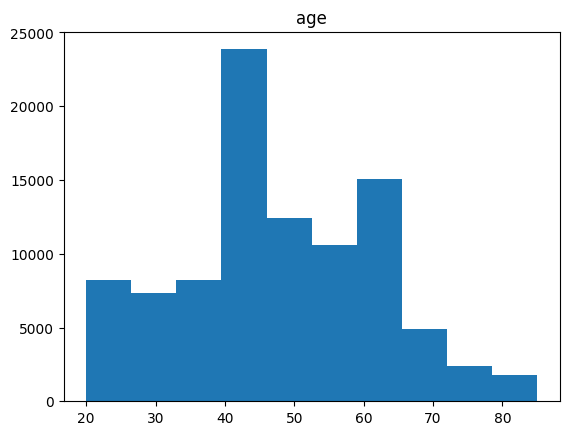

In [6]:
import matplotlib.pyplot as plt

plt.hist(data['age'])
plt.title('age')
plt.show()

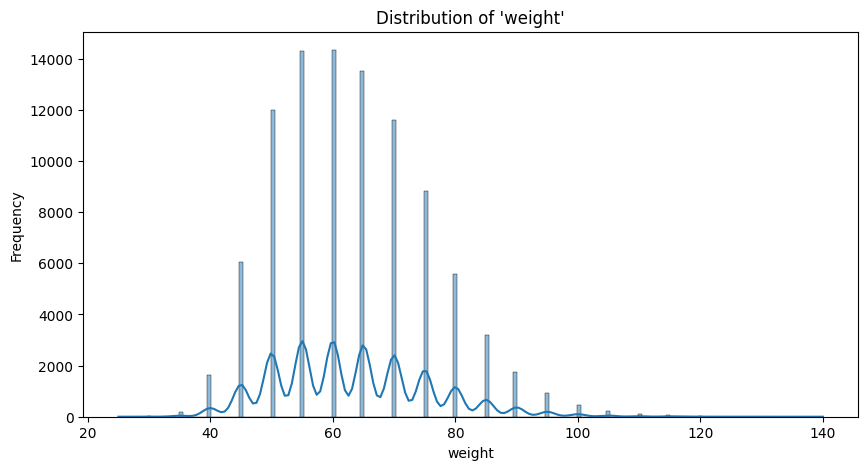

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data['weight'], kde=True)
plt.title("Distribution of 'weight'")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()

## Оценка качества данныx

Необходимо проверить данные на наличие ошибок, пропусков, выбросов, дубликатов и других проблем. Если такие проблемы обнаружены, их нужно решить до начала обучения.

### Проверка наличия пропусков данных

В библиотеке pandas для проверки наличия пропущенных значений можно использовать метод isna() для DataFrame или Series. Метод isna() возвращает булеву маску, где True означает наличие пропущенного значения.

In [8]:
data.nunique() # количество уникальных значений в каждом столбце

sex                   2
age                  14
height               13
weight               23
waistline           599
sight_left           21
sight_right          21
hear_left             2
hear_right            2
SBP                 138
DBP                  96
BLDS                336
tot_chole           319
HDL_chole           142
LDL_chole           289
triglyceride        918
hemoglobin          143
urine_protein         6
serum_creatinine     87
SGOT_AST            253
SGOT_ALT            291
gamma_GTP           574
SMK_stat_type_cd      3
DRK_YN                2
dtype: int64

In [9]:
data.isna().sum(axis=0) # пропущенные значения

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           1
SMK_stat_type_cd    1
DRK_YN              1
dtype: int64

Сразу видим отстутсвие пропущенных значений, и это хорошо, так как данные на обучении будут иметь свою естественную структуру, а нам не придется заполнять пропуски

### Изучение выбросов

Для начала посмотрим на ящики с усами, чтобы визуально определить наличие выбросов в выборке

<Axes: xlabel='age'>

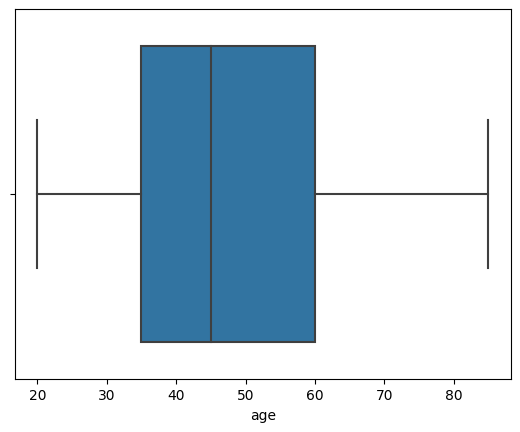

In [10]:
sns.boxplot(data=data, x="age")

<Axes: xlabel='height'>

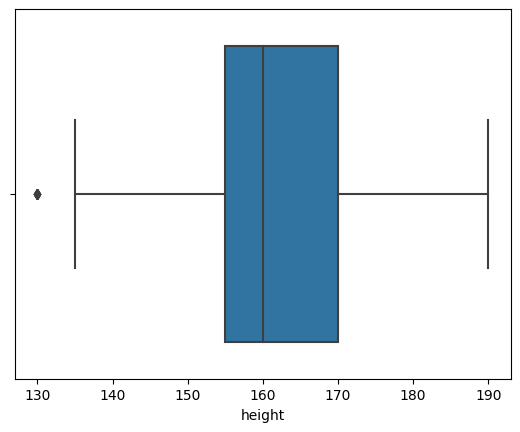

In [11]:
sns.boxplot(data=data, x="height")

<Axes: xlabel='waistline'>

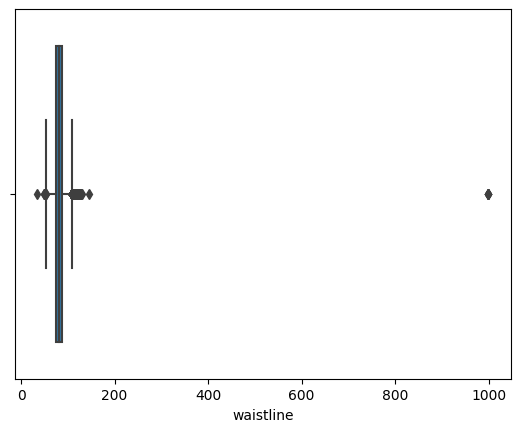

In [12]:
sns.boxplot(data=data, x="waistline")

<Axes: xlabel='sight_left'>

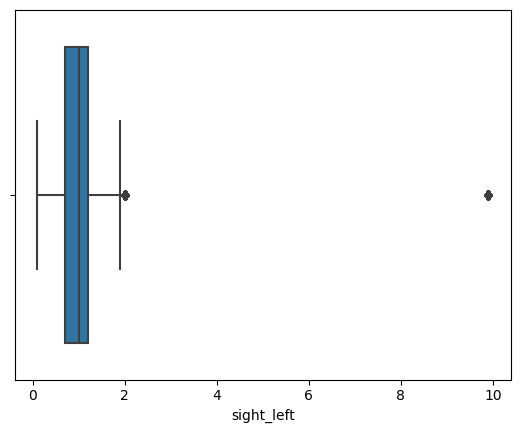

In [13]:
sns.boxplot(data=data, x="sight_left")

<Axes: xlabel='sight_right'>

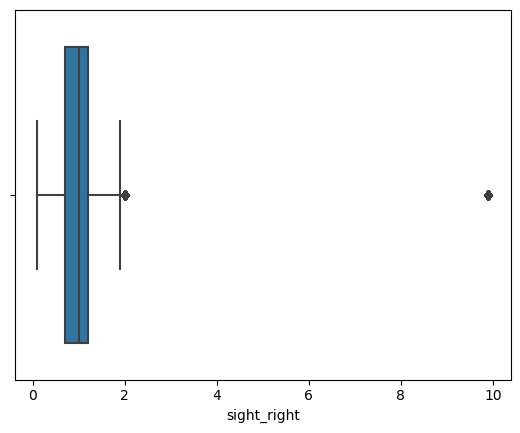

In [14]:
sns.boxplot(data=data, x="sight_right")

Как видим, пропуски все же присутсвуют в данных, поэтому их необходимо очистить, чтобы получить лучшие метрики при обучении модели

Эта функция определяет диапазон выбросов для заданного столбца в данных.
Она вычисляет первый квартиль (25-й перцентиль), третий квартиль (75-й перцентиль) и межквартильный размах (IQR), а затем вычисляет нижнюю и верхнюю границы диапазона выбросов, используя множитель (по умолчанию 1.5).

Функция также выводит количество строк, которые будут затронуты выбросами и возвращает значения нижней и верхней границ диапазона выбросов.

In [15]:
# Определим диапазон выбросов
def get_clean(df, column):
    # Определяем первый и третий квартили и межквартильный размах
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Определяем границы выбросов на основе межквартильного размаха
    lower = q1-iqr*1.5
    upper = q3+iqr*1.5

    # Отбираем только те строки, где значение столбца column находится внутри границ выбросов
    df_clean = df[(upper>=df[column]) & (lower<=df[column])]

    # Возвращаем новый датафрейм без выбросов
    return df_clean

In [16]:
data.waistline.shape

(94875,)

In [17]:
a = get_clean(data, "waistline")
a

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94870,Female,65,150,50,70.2,0.4,0.4,1.0,1.0,136.0,...,93.0,50.0,12.8,1.0,0.8,21.0,22.0,12.0,1.0,N
94871,Male,65,165,70,89.6,1.0,0.8,1.0,1.0,97.0,...,130.0,50.0,14.0,1.0,1.1,17.0,22.0,26.0,2.0,N
94872,Female,45,155,70,85.0,1.0,1.0,1.0,1.0,145.0,...,127.0,89.0,12.7,1.0,0.8,19.0,17.0,32.0,1.0,N
94873,Female,50,160,70,88.0,0.3,0.5,1.0,1.0,103.0,...,85.0,160.0,14.0,1.0,0.6,41.0,20.0,64.0,1.0,N


In [18]:
a.waistline.shape

(94425,)

In [19]:
round(a.waistline.shape[0]/data.waistline.shape[0], 3)

0.995

Мы потеряли 0,4% выборки, но при этом очистили ее от выбросов, что улучшит результат классификации, поэтому сохраняем результат

In [20]:
data = a.copy()

### Заполнение пропущенных значений

Пропущенные значения (missing values) в датасете могут возникать по разным причинам: ошибки сбора данных, ошибки при вводе данных, данные не предоставлены, данные потеряны и т.д. Наличие пропущенных значений в датасете может привести к некорректным результатам анализа данных, поэтому важно обработать эти пропущенные значения.

Существует несколько методов заполнения пропущенных значений в датасете:

Удаление строк или столбцов с пропущенными значениями: данный метод можно использовать, если пропущенные значения не занимают большую долю в датасете. Однако при этом может потеряться много информации.

Заполнение средним значением: данный метод можно использовать для числовых данных. Пропущенные значения заменяются на среднее значение по столбцу. Однако при использовании этого метода важно учитывать распределение данных и возможные выбросы.

Заполнение медианой: данный метод также можно использовать для числовых данных. Пропущенные значения заменяются на медианное значение по столбцу. Этот метод более устойчив к выбросам, чем метод среднего значения.

Заполнение модой: данный метод можно использовать для категориальных данных. Пропущенные значения заменяются на моду по столбцу, то есть на наиболее часто встречающееся значение.

Использование моделей машинного обучения: можно использовать модели машинного обучения для заполнения пропущенных значений. Например, можно обучить модель регрессии для заполнения пропущенных числовых значений или модель классификации для заполнения пропущенных категориальных значений.

При выборе метода заполнения пропущенных значений важно учитывать тип данных, распределение данных, наличие выбросов и объем пропущенных значений.

В случае с категориальным признаком, наиболее простым решением, если пропущенные значения не составляют большинство признака, будет замена наиболее часто встречающимся значением

Ниже пример кода как можно заполнить данные с уже предобработанными некорректными пропущенными значениями

In [21]:
# example['A'].fillna(example['A'].mean(), inplace=True)

В случае с числовым признаком, если опять же, большая часть данных не пропущена, заполнить его среднем значением

Ниже пример кода как можно заполнить данные с уже предобработанными некорректными пропущенными значениями

In [22]:
# example['B'].fillna(example['B'].mode(), inplace=True)

#### Работа с пропущенными значениями

In [23]:
data.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           1
SMK_stat_type_cd    1
DRK_YN              1
dtype: int64

In [58]:
data.SMK_stat_type_cd.value_counts()

1.0    57307
3.0    20353
2.0    16764
Name: SMK_stat_type_cd, dtype: int64

In [62]:
data['gamma_GTP'].fillna(data['gamma_GTP'].mean(), inplace=True)
data['SMK_stat_type_cd'].fillna(data['SMK_stat_type_cd'].mode(), inplace=True)
data['DRK_YN'].fillna(data['DRK_YN'].mode(), inplace=True)

Пропуски в данных были заполнены. В числовых признаках заполнение производилось по среднему значению выборки, в категориальных по моде.

## Исследование взаимосвязей

Необходимо исследовать взаимосвязи между переменными, чтобы определить, какие факторы оказывают влияние на целевую переменную. Для этого могут использоваться корреляционные матрицы, диаграммы рассеяния и другие графики.

### Матрица корреляции

Существует встроенная в seaborn функция визуализирующая матрицу корреляций признаков

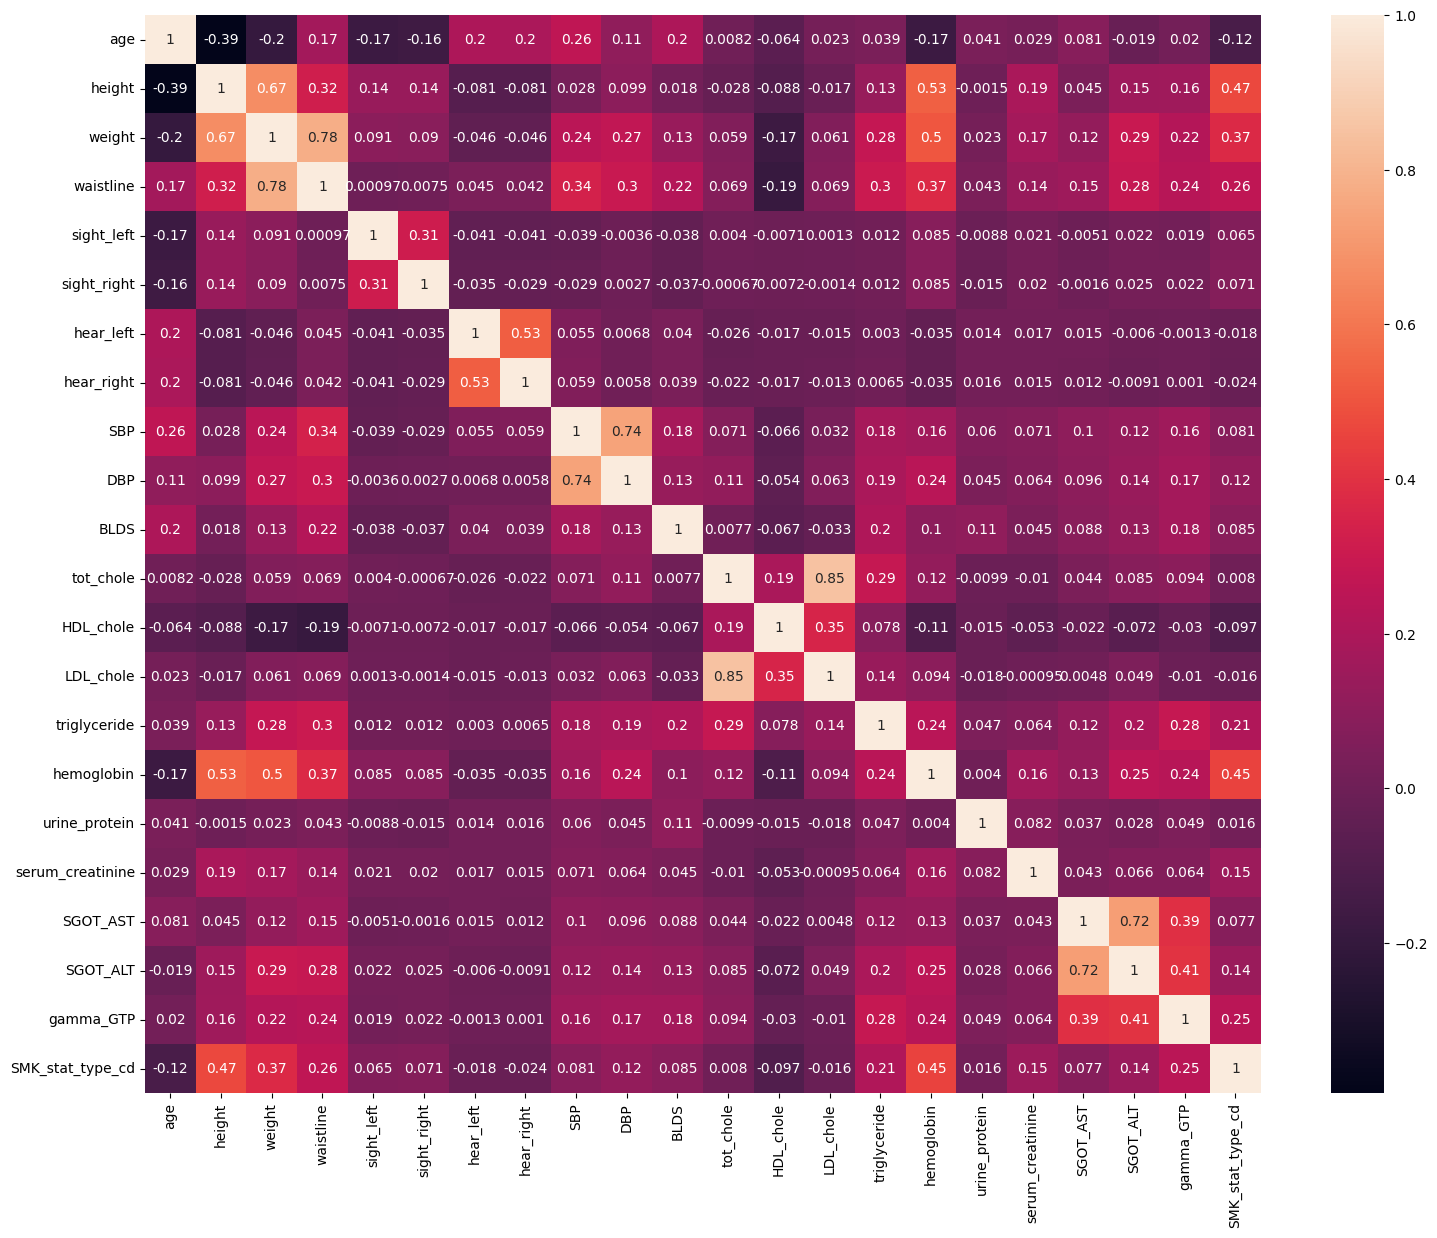

In [24]:
# Создание графика и задание его размеров
fig = plt.figure(figsize=(18, 14))

sns.heatmap(data.corr(), annot = True) # annot добавляет значение корреляции

# Отображение графика
plt.show()

### Диаграмма рассеяния

Существует встроенная в seaborn функция визуализирующая диаграму рассеяния признаков

In [25]:
# graph = sns.PairGrid(data) # строим сетку по 2 признакам для каждого столбца таблицы
# graph.map(plt.scatter) # строим графики из точек для всех элементов списка

Слишком долго на колабе

# 2. Предобработка данных

### Очистка данных (Data Cleaning)

Удаление отсутствующих значений (NaN), выбросов и дубликатов, исправление опечаток.



#### Удаление дубликатов

In [26]:
print(data.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
94870    False
94871    False
94872    False
94873    False
94874    False
Length: 94425, dtype: bool


In [27]:
data = data.drop_duplicates()

#### Удаление отсутствующих значений

In [28]:
print(data.isnull())

         sex    age  height  weight  waistline  sight_left  sight_right  \
0      False  False   False   False      False       False        False   
1      False  False   False   False      False       False        False   
2      False  False   False   False      False       False        False   
3      False  False   False   False      False       False        False   
4      False  False   False   False      False       False        False   
...      ...    ...     ...     ...        ...         ...          ...   
94870  False  False   False   False      False       False        False   
94871  False  False   False   False      False       False        False   
94872  False  False   False   False      False       False        False   
94873  False  False   False   False      False       False        False   
94874  False  False   False   False      False       False        False   

       hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  \
0          False  

In [29]:
data = data.dropna()

### Кодирование категориальных данных (Categorical Data Encoding)

Преобразование категориальных данных (например, типа "город" или "страна") в числовой формат, который может быть использован алгоритмами машинного обучения.



Кодирование категориальных данных - это процесс преобразования категориальных признаков (например, цвет, марка, тип и т.д.) в числовой формат. Это необходимо, так как многие алгоритмы машинного обучения требуют, чтобы все признаки были числовыми. Существует несколько методов кодирования категориальных данных, и вот некоторые из них:

- Label Encoding (Кодирование меток) - это простой метод, который заключается в присвоении каждой уникальной категории целочисленного значения. Например, если у нас есть столбец "цвет" с категориями "красный", "синий" и "зеленый", то "красный" может быть закодирован как 1, "синий" как 2, а "зеленый" как 3.

- One-Hot Encoding (одноразрядное кодирование) - это метод, который создает новые бинарные признаки для каждой уникальной категории. Например, если у нас есть столбец "цвет" с категориями "красный", "синий" и "зеленый", то мы можем создать три новых признака: "цвет_красный", "цвет_синий" и "цвет_зеленый". Если строка содержит категорию "красный", то значение "цвет_красный" будет равно 1, а все остальные значения будут равны 0.

- Binary Encoding (двоичное кодирование) - это метод, который заключается в присвоении каждой уникальной категории целочисленного значения и дальнейшем представлении этого значения в бинарном формате. Например, если у нас есть столбец "цвет" с категориями "красный", "синий" и "зеленый", то "красный" может быть закодирован как 1 (0001 в бинарном формате), "синий" как 2 (0010 в бинарном формате), а "зеленый" как 3 (0100 в бинарном формате).

Кодирование категориальных данных является важной частью предварительной обработки данных в машинном обучении, и выбор метода кодирования зависит от конкретной задачи и характеристик данных.

#### Преобразование категориальных данных в числовой формат

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['DRK_YN'] = label_encoder.fit_transform(data['DRK_YN'])

In [31]:
data

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94869,0,55,160,75,88.5,0.9,0.8,1.0,1.0,114.0,...,134.0,238.0,13.4,1.0,0.7,29.0,28.0,41.0,1.0,0
94870,0,65,150,50,70.2,0.4,0.4,1.0,1.0,136.0,...,93.0,50.0,12.8,1.0,0.8,21.0,22.0,12.0,1.0,0
94871,1,65,165,70,89.6,1.0,0.8,1.0,1.0,97.0,...,130.0,50.0,14.0,1.0,1.1,17.0,22.0,26.0,2.0,0
94872,0,45,155,70,85.0,1.0,1.0,1.0,1.0,145.0,...,127.0,89.0,12.7,1.0,0.8,19.0,17.0,32.0,1.0,0


#### Преобразование категориальных данных в бинарный формат

In [32]:
# from sklearn.preprocessing import OneHotEncoder

# one_hot_encoder = OneHotEncoder()
# one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['A']]).toarray(),
#                                 columns=one_hot_encoder.get_feature_names(['A']))
# df = pd.concat([df, one_hot_encoded], axis=1)

pandas.get_dummies() - функция из библиотеки Pandas, которая создает фиктивные переменные для каждой уникальной категории в столбце категориальных данных. Например, если у нас есть столбец "Цвет", который может содержать значения "Красный", "Зеленый" и "Синий", функция get_dummies() создаст три новых столбца, каждый из которых будет иметь значения 0 или 1 в зависимости от того, какая категория была в исходном столбце.

In [33]:
# new_data = pd.get_dummies(data)

### Создание новых признаков (Feature Engineering)

Создание новых признаков на основе имеющихся данных, которые могут улучшить производительность модели.



Создание новых признаков на основе имеющихся данных является одним из важных шагов в подготовке данных для обучения модели машинного обучения. Новые признаки могут улучшить производительность модели, сделать ее более точной и улучшить ее способность к обобщению.

Новые признаки могут быть созданы на основе существующих признаков, например, путем объединения нескольких признаков в один или разбиением одного признака на несколько частей. Новые признаки могут также быть созданы на основе внешних данных, которые могут помочь расширить информационное пространство и улучшить способность модели к обобщению.

Примеры создания новых признаков:

- Создание нового признака, который показывает общее количество дней, прошедших с момента последнего визита пользователя на сайт до совершения им покупки.
- Создание нового признака, который описывает отношение площади квартиры к количеству комнат.
- Создание нового признака, который показывает среднюю стоимость товаров, купленных пользователем за последние 6 месяцев.

В целом, создание новых признаков является важным шагом в подготовке данных для машинного обучения, так как позволяет расширить обучающую выборку

In [34]:
# # создадим новый признак
# data['AB'] = data['A'] + data['B']

### Балансировка классов (Class Balancing)

При несбалансированном распределении классов в данных, применяется методы, которые учитывают меньшинство классов.



Балансировка классов - это процесс изменения распределения классов в наборе данных, чтобы сделать его более сбалансированным. Это может быть необходимо, когда в наборе данных присутствуют классы с низкой частотой, которые могут быть необходимы для обучения модели. Без балансировки классов модель может быть смещена в сторону более частых классов, что может привести к плохой производительности на меньшинстве классов.

Существуют различные методы балансировки классов, такие как:

- Undersampling (Снижение размера большего класса) - это метод, который уменьшает размер большего класса, чтобы сделать его более сбалансированным с меньшим классом.

- Oversampling (Увеличение размера меньшего класса) - это метод, который увеличивает размер меньшего класса, чтобы сделать его более сбалансированным с большим классом.

- Synthetic Sampling (Синтетическое дублирование данных меньшего класса) - это метод, который создает новые данные для меньшего класса, чтобы сделать его более сбалансированным с большим классом.

- Class Weighting (Взвешивание классов) - это метод, который вводит веса для каждого класса в функции потерь, чтобы учитывать дисбаланс классов.

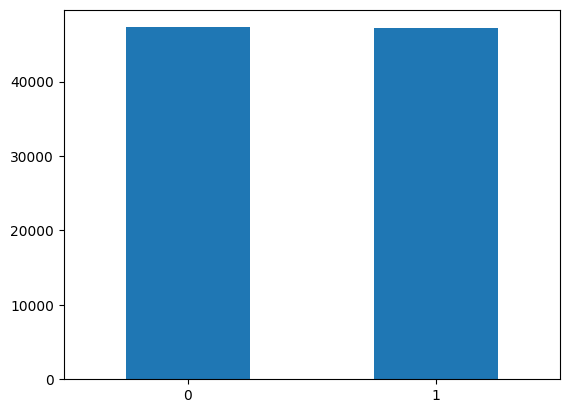

In [35]:
targets_counts = pd.value_counts(data['DRK_YN'])
targets_counts.plot.bar(rot=0)
plt.show()

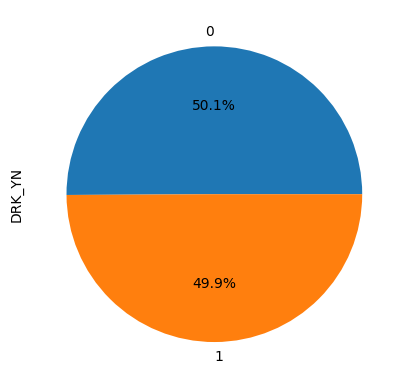

In [36]:
data['DRK_YN'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [37]:
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)


Можно видеть, что выборка идеально сбалансированная

### Масштабирование данных (Data Scaling)

Приведение данных к одному масштабу (например, нормализация данных в диапазоне от 0 до 1 или стандартизация данных с нулевым средним и единичной дисперсией).

#### Нормализация данных в диапазоне от 0 до 1

Нормализация - это процесс приведения значений признаков к определенному диапазону. Это полезно, когда значения признаков сильно различаются по масштабу, например, один признак находится в диапазоне [0,1], а другой - в диапазоне [0, 10^5]. В таком случае модель может оказаться менее точной или сильно зависимой от одного из признаков.

Существует несколько методов нормализации:

- Min-max нормализация: каждое значение признака приводится к диапазону [0,1] путем вычитания минимального значения и деления на разность между максимальным и минимальным значениями. Формула: (x - min) / (max - min), где x - значение признака, min - минимальное значение признака, max - максимальное значение признака.

- Z-нормализация (стандартизация): каждое значение признака приводится к стандартному нормальному распределению с нулевым средним и единичной дисперсией. Формула: (x - mean) / std, где x - значение признака, mean - среднее значение признака, std - стандартное отклонение признака.

- Логарифмическая нормализация: каждое значение признака заменяется на его натуральный логарифм. Это может быть полезно, когда значения признаков имеют экспоненциальный рост.

- Другие методы нормализации включают в себя преобразование Бокса-Кокса и Yeo-Johnson.

Выбор метода нормализации зависит от конкретной задачи и типа данных. Некоторые модели, такие как нейронные сети, могут лучше работать с одним методом нормализации, чем с другим.

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [39]:
# from sklearn.preprocessing import normalize

# X = normalize(data)

#### Стандартизация данных

Стандартизация данных - это процесс приведения данных к определенному стандарту, который обеспечивает их согласованность и сопоставимость. Это может быть полезно во многих областях, где данные используются для анализа, обработки или хранения.

Одним из наиболее распространенных методов стандартизации данных является центрирование и масштабирование (Z-преобразование). Этот метод заключается в том, чтобы вычесть среднее значение всех значений из каждого значения и затем разделить на стандартное отклонение всех значений. Результатом являются данные со средним значением, равным нулю, и стандартным отклонением, равным единице.

Другой метод стандартизации данных - это мин-макс масштабирование. Этот метод заключается в приведении значений к интервалу между 0 и 1. Для этого каждое значение вычитается из минимального значения в наборе данных и затем делится на разницу между максимальным и минимальным значениями.

Кроме того, стандартизация может включать в себя такие операции, как преобразование типов данных, удаление дубликатов и пропущенных значений, агрегирование данных и приведение их к общей единице измерения.

In [40]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Понижение размерности данных (Dimensionality Reduction)

Снижение количества признаков путем удаления ненужных или коррелирующих признаков или использование методов снижения размерности, таких как метод главных компонент (PCA).




PCA (Principal Component Analysis) - это метод анализа данных, который используется для снижения размерности набора данных путем преобразования его в новый набор переменных, называемый главными компонентами. Главные компоненты являются линейными комбинациями исходных переменных, которые максимизируют объясненную дисперсию данных.

Применение PCA может быть полезным во многих ситуациях, включая снижение размерности набора данных, устранение мультиколлинеарности, ускорение обучения моделей машинного обучения, уменьшение шума и улучшение визуализации данных.

Алгоритм PCA состоит из следующих шагов:

- Вычисление матрицы ковариации для исходного набора данных.
- Расчет собственных значений и собственных векторов матрицы ковариации.
- Сортировка собственных значений в порядке убывания и выбор первых k собственных векторов, соответствующих k самым большим собственным значениям.
- Проекция исходных данных на новое пространство признаков, построенное из выбранных собственных векторов.


In [41]:
data.shape

(94424, 24)

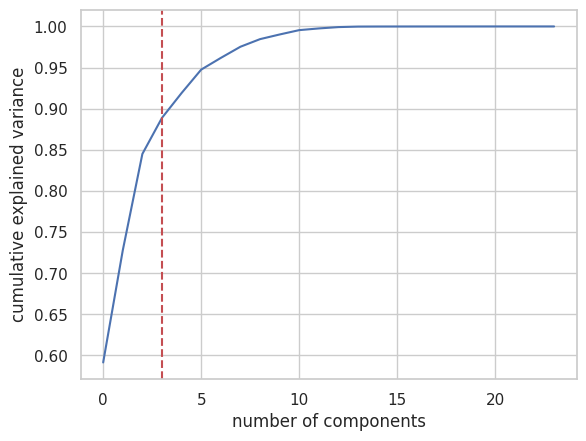

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.591495,0.591495
1,0.727775,0.136280
2,0.845028,0.117252
3,0.888897,0.043869
4,0.919061,0.030164
5,0.947543,0.028482
6,0.961751,0.014208
7,0.975318,0.013567
8,0.984565,0.009248
9,0.990232,0.005667


In [42]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=24)
pca_test.fit(data)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(3, color='r', linestyle = '--')
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

воспользуемся PCA для уменьшения числа компонент с 24 до 3

In [43]:
pca = PCA(n_components=3)
pca.fit(data)
data_pca = pca.transform(data)

In [44]:
data_pca.shape

(94424, 3)

In [45]:
data_pca = pd.DataFrame(data_pca)

Это преобразование позовляет строить визуализации данных, но при этом упускает часть информации изначальног датасета, поэтому в обучении лучше использовать неизмененную выборку

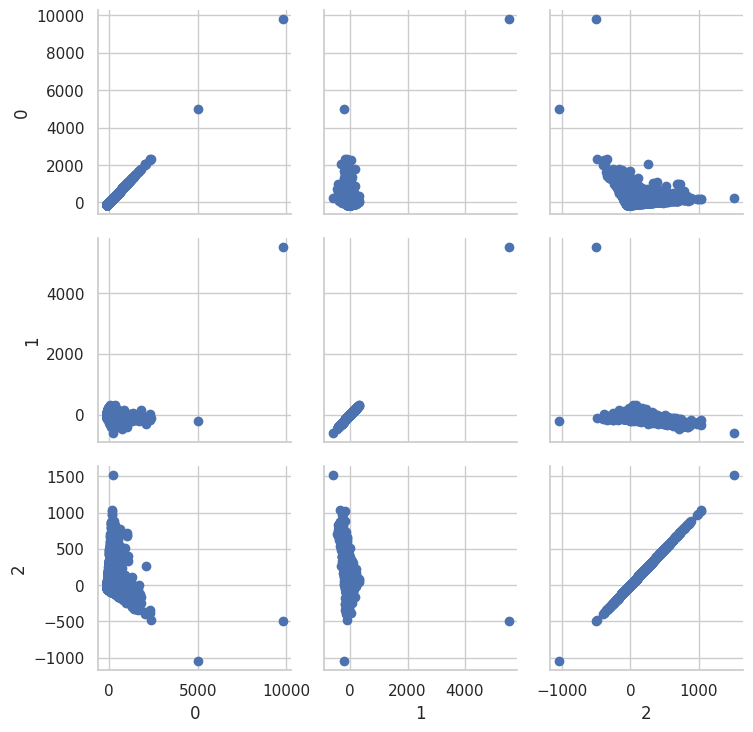

In [46]:
graph = sns.PairGrid(data_pca) # строим сетку по 2 признакам для каждого столбца таблицы
graph.map(plt.scatter) # строим графики из точек для всех элементов списка

### Разделение данных (Data Splitting)

Разделение данных на тренировочную, валидационную и тестовую выборки.

Разделение данных - это процесс разделения набора данных на обучающую и тестовую выборки для обучения и оценки модели машинного обучения. Обучающая выборка используется для обучения модели, а тестовая выборка используется для проверки ее производительности на новых, ранее не виданных данных.

Обычно данные разделяют в пропорции 70/30, 80/20 или 90/10, где 70%, 80% или 90% данных используется для обучения, а остальные 30%, 20% или 10% данных используются для тестирования.

Из-за слишком большого объема данных, их приходится разделить, и взять случайную долю выборки, чтобы продемонстрировать резултат работы моделей

In [47]:
from sklearn.utils import resample

random_data = resample(data, n_samples=20000, random_state=42)

In [48]:
random_data.shape

(20000, 24)

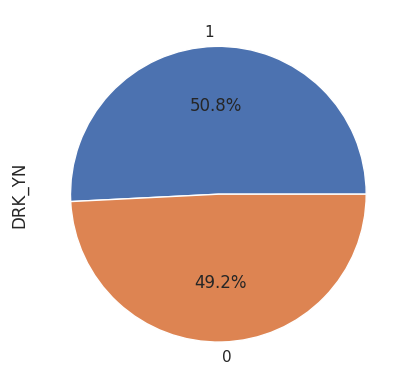

In [49]:
random_data['DRK_YN'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Как мы можем заметить, выборка была снижена до 20 000 элементов, но при этом, распределение внутри нее не изменилось из за случайности выбора элементов

In [50]:
from sklearn.preprocessing import MinMaxScaler

x = random_data.drop(["DRK_YN"], axis = 1)
y = random_data["DRK_YN"]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split

# Деление на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Обучение моделей

## Классическое машинное обучение

Я взял несколько моделей для сравнения и занес их конечные метрики в единую сводную таблицу.

Формируем пустую сводную таблицу, чтобы потом заполнить ее значениями

In [ ]:
scores = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'duration'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP',
        'DecisionTree',
        'RandomForest',
        'GradientBoosting',
        'GaussianNB'
    ]
)

Функция для получения метрик качества моделей

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

def get_metrics(y_test, y_pred):
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    return pd.Series(
        (accuracy_score, precision_score, recall_score, f1_score, roc_auc),
        index=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
    )

Accuracy (точность) - это метрика, которая показывает, как много примеров из тестовой выборки были предсказаны верно. Accuracy определяется как отношение числа правильно классифицированных примеров к общему числу примеров.

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$

Precision - это метрика качества модели, которая показывает, как часто модель правильно классифицирует положительные примеры. Она определяется как отношение числа верно классифицированных положительных примеров к числу всех примеров, классифицированных как положительные.

$$Precision=\frac{TP}{TP+FP}$$

Recall (полнота) - это метрика, которая оценивает способность модели находить все положительные образцы в наборе данных. Она измеряет, как много релевантных образцов было найдено моделью из общего числа релевантных образцов в наборе данных.

$$Recall=\frac{TP}{TP+FN}$$

F1 score — это среднее гармоническое precision и recall. Это метрика, которая показывает баланс между precision и recall и является хорошим индикатором для оценки качества модели.

F1 score дает более точную информацию о качестве модели, чем accuracy, если в данных присутствует дисбаланс классов. Если, например, один класс присутствует в данных гораздо чаще, чем другой класс, то accuracy может быть высокой, даже если модель классифицирует хуже для редкого класса. В такой ситуации более информативными могут быть precision, recall и F1 score.

F1 score принимает значения в диапазоне от 0 до 1, где 1 — это идеальное значение, которое означает, что модель работает наилучшим образом, а 0 — это худшее значение, которое означает, что модель не предсказывает ни один из классов.

$$F1 score = \frac{2*Precision*Recall}{Precision+Recall}$$

Функция обучения и записи времени процесса обучения модели в секундах

In [53]:
import time
from sklearn import metrics
from sklearn.model_selection import learning_curve

def model_and_metrics(model):

    # начало обучения модели
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # конец обучения модели
    end = time.time()

    # график обучения

    # Training examples
    train_sizes, train_scores, valid_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    # Testing examples
    test_sizes, test_scores, valid_scores = learning_curve(model, x_test, y_test, cv=5, scoring='accuracy')
    test_scores_mean = -np.mean(test_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(test_sizes, test_scores_mean, 'o-', color='b', label='Testing')
    plt.plot(test_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Testing examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    duration = pd.Series([end - start])
    returned = pd.concat([get_metrics(y_test, y_pred), duration])
    return returned

График learning_curve отображает зависимость качества модели от объёма обучающей выборки. График позволяет определить, достаточно ли данных для обучения модели, или же необходим дополнительный объем данных для улучшения качества модели. Кривая, отражает показатель качества на валидационной выборке в зависимости от объема обучающей выборки, чтобы выявить переобучение модели.

### #1 Classic model (LogisticRegression)

Logistic Regression - это алгоритм машинного обучения, который используется для решения задач классификации, т.е. для разделения данных на категории или классы.

Логистическая регрессия основывается на функции логистической сигмоиды, которая преобразует линейный входной сигнал в вероятность. То есть, логистическая регрессия представляет собой обучение модели, которая использует линейную комбинацию входных признаков для прогнозирования вероятности отнесения объекта к одному из двух классов.

Модель логистической регрессии обучается с помощью метода максимального правдоподобия, который позволяет найти наилучшие значения параметров модели, максимизирующие вероятность наблюдаемых данных.

В логистической регрессии используется также регуляризация, которая помогает бороться с переобучением модели.

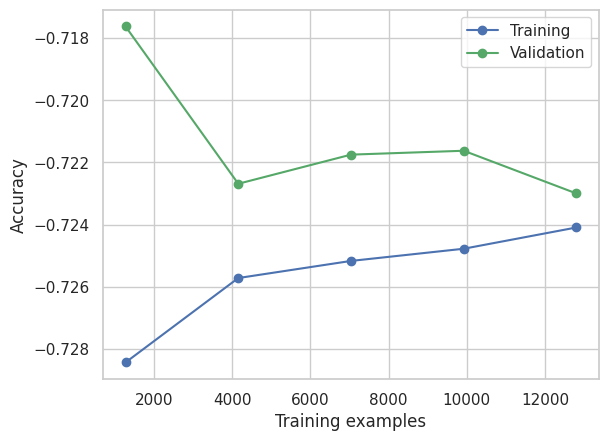

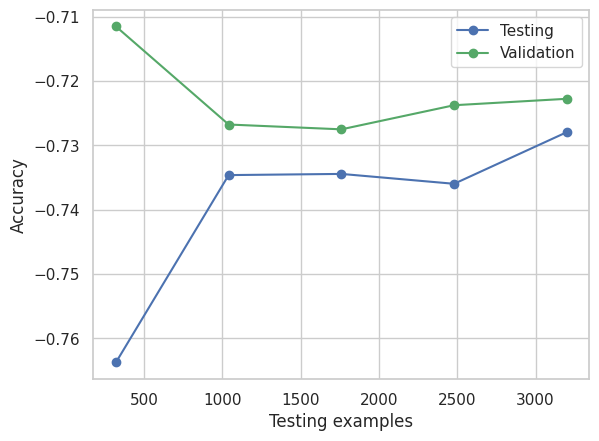

[[1464  507]
 [ 595 1434]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1971
           1       0.74      0.71      0.72      2029

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.73      0.72      0.72      4000



In [ ]:
from sklearn.linear_model import LogisticRegression

scores.iloc[0] = model_and_metrics(LogisticRegression())

### #2 Classic model (SVM.linear)

SVM - это метод машинного обучения, который использует гиперплоскость для разделения классов в многомерном пространстве. Линейное ядро в SVM представляет собой обычную линейную функцию, которая стремится разделить классы на две группы с помощью гиперплоскости в пространстве признаков.

Модель svm.SVC(kernel='linear') подходит для задач классификации с двумя классами и может использоваться для разделения данных с линейно разделимыми классами. Обучение модели происходит путем поиска гиперплоскости, которая разделяет классы наиболее точно. SVM поддерживает не только линейные ядра, но также может использовать ядра с нелинейными функциями, такие как полиномиальные и радиально-базисные функции.

Для обучения модели SVM c линейным ядром используется метод оптимизации под названием Sequential Minimal Optimization (SMO), который является быстрым и эффективным методом для решения оптимизационной задачи SVM.

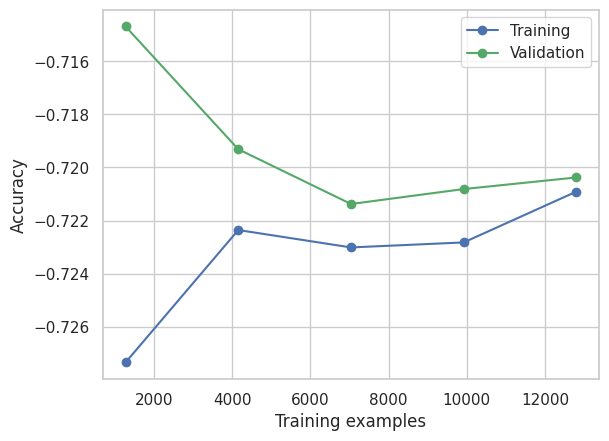

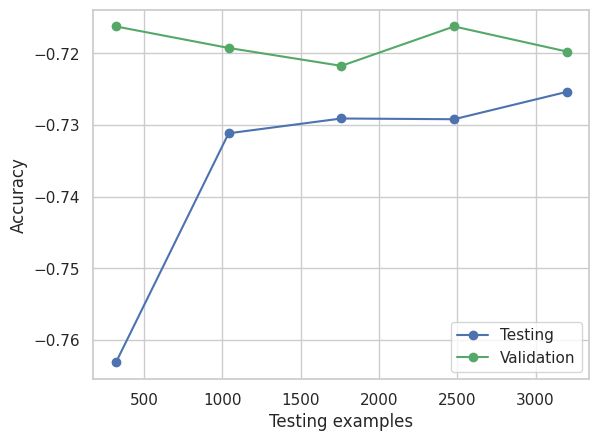

[[1434  537]
 [ 590 1439]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1971
           1       0.73      0.71      0.72      2029

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



In [ ]:
from sklearn import svm

scores.iloc[1] = model_and_metrics(svm.SVC(kernel='linear'))

### #3 Classic model (SVM.rbf)

RBF-ядро является одним из наиболее популярных ядер, используемых в SVM для обработки нелинейных данных.

Суть работы алгоритма SVM с ядром RBF заключается в следующем:

- Выбрать оптимальные параметры ядра RBF.
- Обучить классификатор SVM на обучающих данных.
- Применить обученный классификатор SVM к новым данным для классификации.

Классификатор SVM с ядром RBF является более гибким по сравнению с классификатором SVM с линейным ядром, так как позволяет лучше разделить нелинейные данные. Однако, он имеет больше параметров, которые нужно настроить для достижения лучшей производительности модели. Также, в отличие от линейного ядра, классификатор с RBF-ядром склонен к переобучению на небольших выборках данных.

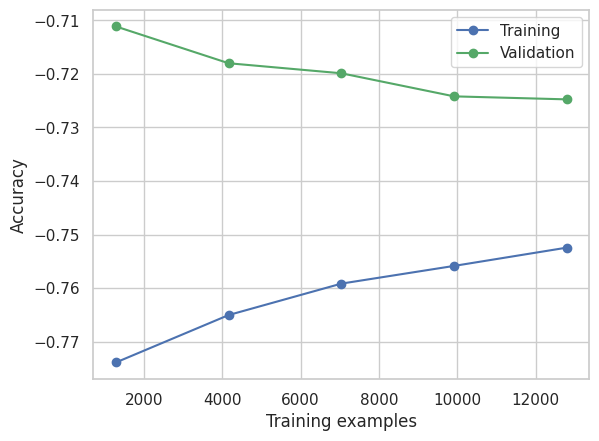

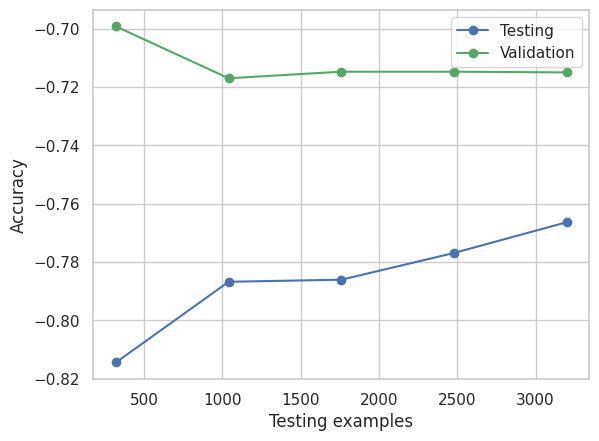

[[1410  561]
 [ 527 1502]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1971
           1       0.73      0.74      0.73      2029

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
from sklearn import svm

scores.iloc[2] = model_and_metrics(svm.SVC(kernel='rbf'))

### #4 Classic model (KNeighborsClassifier)

KNeighborsClassifier - это алгоритм классификации, который основывается на определении класса объекта путем анализа классов его ближайших соседей в пространстве признаков.

В данном алгоритме объекты сравниваются на основе расстояния между ними в пространстве признаков. Определяется k ближайших соседей для каждого объекта, после чего класс объекта определяется на основе классов его соседей. Обычно для вычисления расстояний между объектами используется евклидово расстояние, однако возможно использование и других метрик.

Количество соседей k - это один из гиперпараметров модели, который определяется заранее. Если k=1, то классификация объекта производится на основе класса его ближайшего соседа. Если k>1, то классификация производится путем голосования за наиболее часто встречающийся класс среди k ближайших соседей.

Кроме того, для работы модели необходимо выбрать метрику расстояния и метод взвешивания расстояний.

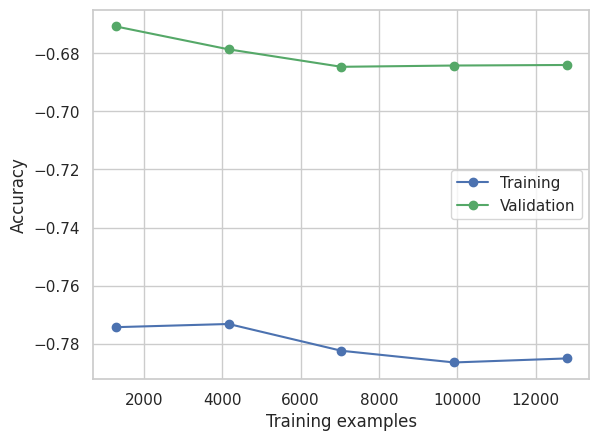

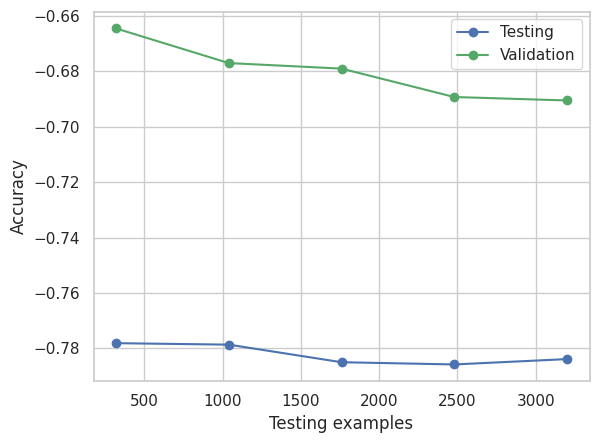

[[1357  614]
 [ 605 1424]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1971
           1       0.70      0.70      0.70      2029

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

scores.iloc[3] = model_and_metrics(KNeighborsClassifier())

### #5 Classic model (MLPClassifier)

MLPClassifier - это алгоритм машинного обучения, который относится к семейству нейронных сетей. Он использует многослойную перцептронную модель, которая состоит из нескольких скрытых слоев, каждый из которых содержит набор нейронов. MLPClassifier используется для задач классификации, то есть он пытается определить, к какому классу относится входной образец данных.

Основная идея MLPClassifier заключается в том, чтобы обучать модель путем подачи обучающих примеров на вход нейронной сети и последующей корректировки весов между нейронами. Это происходит через процесс обратного распространения ошибки (backpropagation), в котором модель сначала делает предсказание, затем оценивает, насколько оно верно, и корректирует веса, чтобы улучшить предсказания на следующей итерации.

MLPClassifier позволяет настраивать множество параметров, включая количество скрытых слоев, количество нейронов в каждом слое, тип функции активации, метод оптимизации и т.д. Одним из главных параметров MLPClassifier является alpha, который контролирует уровень регуляризации. Большие значения alpha могут привести к уменьшению переобучения модели, но также могут снизить ее общую точность.

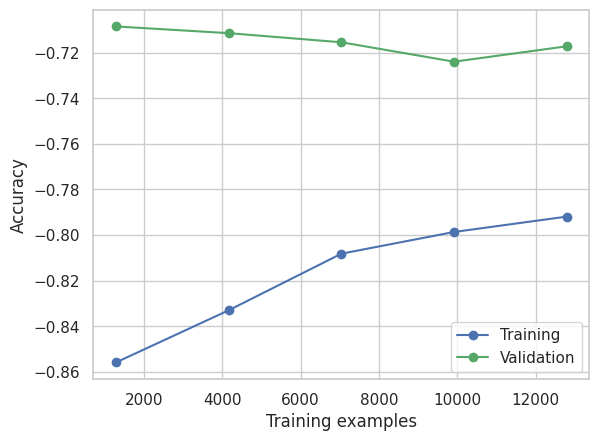

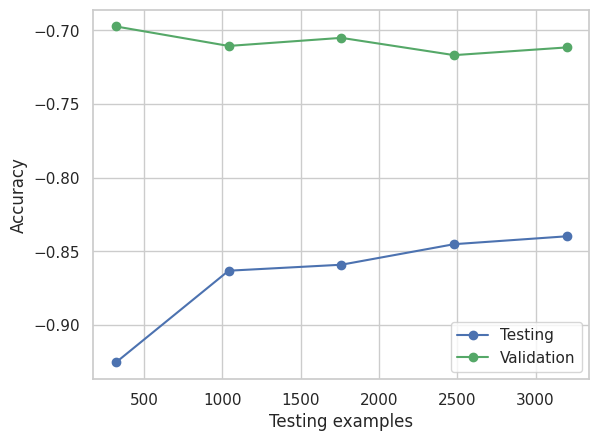

[[1407  564]
 [ 526 1503]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1971
           1       0.73      0.74      0.73      2029

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
from sklearn.neural_network import MLPClassifier

scores.iloc[4] = model_and_metrics(MLPClassifier())

### #6 Classic model (DecisionTree)

DecisionTree (Дерево решений) - это один из наиболее популярных методов машинного обучения для задач классификации и регрессии. Он является примером обучения с учителем и используется для построения модели прогнозирования на основе множества правил.

Принцип работы алгоритма заключается в разбиении исходного набора данных на более мелкие поднаборы, путем построения древовидной структуры, где каждый узел дерева представляет собой условие на одном из признаков, а каждое ребро - возможный результат теста. Древо строится снизу вверх, начиная с корневого узла, где разбиение основано на наиболее значимом признаке, и продолжается до тех пор, пока не будет достигнут критерий остановки, например, достижение максимальной глубины или минимального количества объектов в листе.

После построения дерева, каждый объект классифицируется путем прохождения по нему, начиная с корневого узла и двигаясь вниз по ребрам до достижения листового узла. Классификация происходит на основе меток классов в листовом узле.

Одним из преимуществ DecisionTree является его интерпретируемость, что означает возможность легкого понимания результата, полученного моделью. Также DecisionTree устойчив к выбросам и нечувствителен к масштабированию признаков.

Однако, как и у любой модели машинного обучения, есть и недостатки. DecisionTree склонен к переобучению на больших датасетах и может давать плохие результаты на данных, которые не были представлены во время обучения модели.

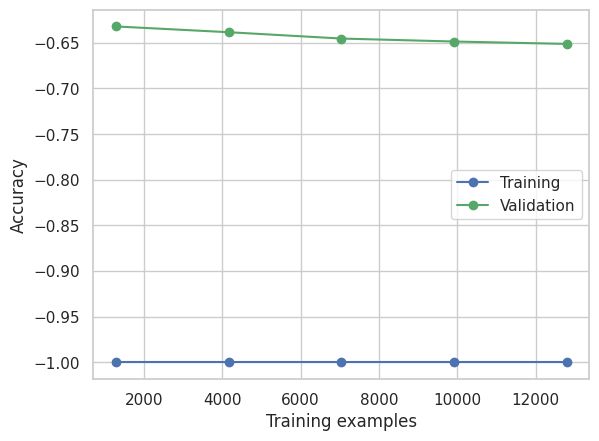

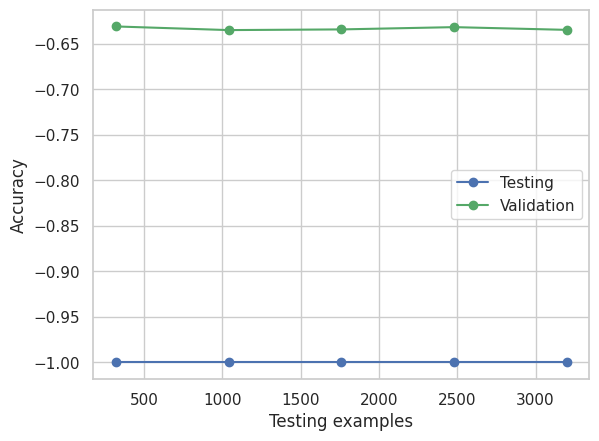

[[1293  678]
 [ 708 1321]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1971
           1       0.66      0.65      0.66      2029

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores.iloc[5] = model_and_metrics(DecisionTreeClassifier())

### #7 Classic model (RandomForest)

Random Forest (случайный лес) - это алгоритм машинного обучения, который использует ансамбль решающих деревьев для решения задач классификации, регрессии и кластеризации. Он является одним из наиболее популярных алгоритмов машинного обучения и широко используется в различных областях, включая банкинг, финансы, медицину, науку о данных и другие.

Случайный лес состоит из множества решающих деревьев, каждое из которых строится на основе случайной подвыборки данных. Это позволяет уменьшить вероятность переобучения и повысить качество предсказаний. Кроме того, случайный лес позволяет оценить важность признаков, что может быть полезно при анализе данных.

Для построения случайного леса сначала выбирается количество деревьев, которые должны быть включены в ансамбль. Затем для каждого дерева выбирается случайная подвыборка данных и случайный поднабор признаков. Затем строится дерево решений, которое оптимизируется на основе выбранного критерия (например, энтропии или Джини). Критерий оценивает, насколько хорошо каждый признак разделяет данные на классы или прогнозирует значение.

После построения всех деревьев случайный лес может использоваться для предсказания новых данных. Для каждого дерева происходит предсказание, затем выбирается наиболее часто встречающийся класс или среднее значение, и это становится итоговым предсказанием.

Случайный лес имеет несколько преимуществ по сравнению с одним решающим деревом, включая более точные предсказания и устойчивость к шумам в данных. Кроме того, случайный лес хорошо работает с большими объемами данных и может обрабатывать как числовые, так и категориальные признаки.

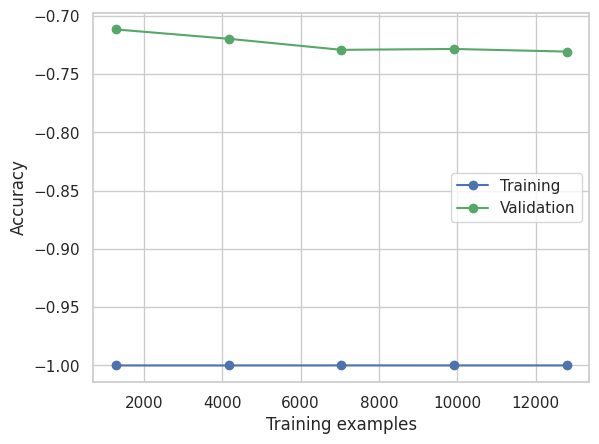

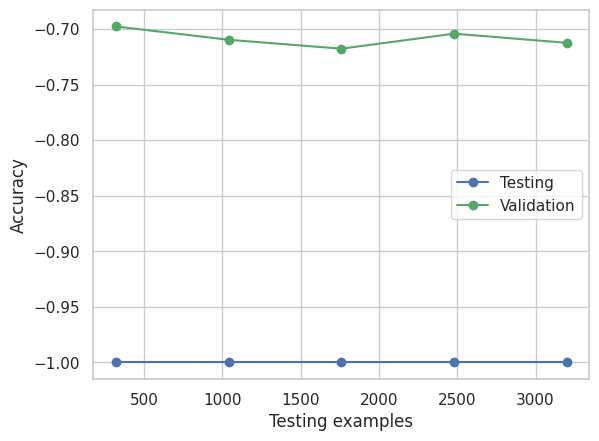

[[1439  532]
 [ 532 1497]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1971
           1       0.74      0.74      0.74      2029

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores.iloc[6] = model_and_metrics(RandomForestClassifier())

### #8 Classic model (GradientBoosting)

Gradient Boosting (GB) - это метод машинного обучения, который основан на построении ансамбля (ensemble) слабых моделей, как правило, деревьев решений. Основная идея GB заключается в том, чтобы последовательно строить новые модели, которые будут исправлять ошибки предыдущих моделей. Таким образом, каждая новая модель учитывает ошибки предыдущих моделей, и все модели образуют сильную модель.

Алгоритм GB работает следующим образом:

Сначала мы создаем модель, которая делает предсказания на основе среднего значения целевой переменной в тренировочных данных.

Затем мы строим следующую модель, используя реальные значения целевой переменной и ошибки предыдущей модели.

Новая модель старается исправить ошибки предыдущей модели.

Мы продолжаем строить новые модели и добавлять их к ансамблю до тех пор, пока не достигнем установленного числа деревьев.

Основными параметрами GB являются:

learning rate (шаг обучения), который определяет величину обновления весов на каждой итерации.

число деревьев (n_estimators), которые будут использоваться для построения ансамбля.

максимальная глубина дерева (max_depth), которая определяет глубину дерева решений.

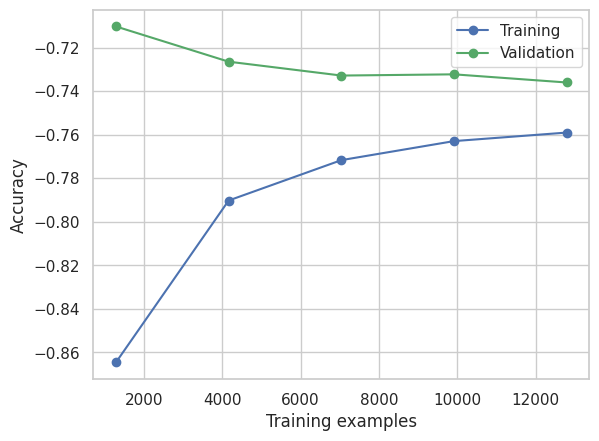

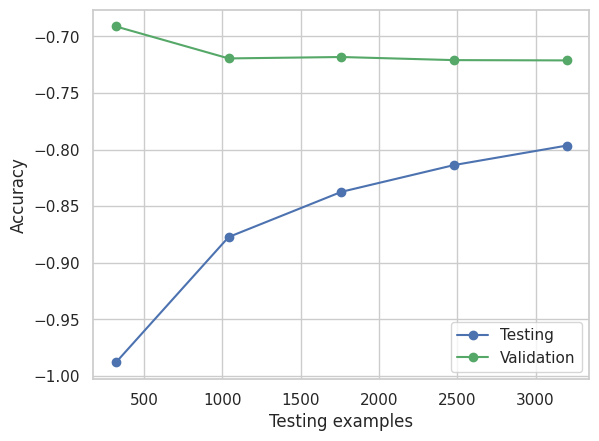

[[1408  563]
 [ 509 1520]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1971
           1       0.73      0.75      0.74      2029

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

scores.iloc[7] = model_and_metrics(GradientBoostingClassifier())

### #9 Classic model (GaussianNB)

Gaussian Naive Bayes (GNB) - это вероятностный алгоритм классификации, основанный на теореме Байеса и условии независимости. Этот алгоритм предполагает, что значения каждого признака в каждом классе имеют гауссово распределение. GNB использует эти распределения, чтобы оценить вероятность того, что объект принадлежит к определенному классу. Затем он выбирает класс с максимальной вероятностью как прогноз.

Главное преимущество GNB заключается в его простоте и скорости работы. Этот алгоритм работает хорошо на наборах данных с множеством признаков, но может давать плохие результаты, если признаки сильно коррелируют между собой. Кроме того, GNB не учитывает взаимодействия между признаками и не может захватывать нелинейные зависимости между признаками и целевой переменной.

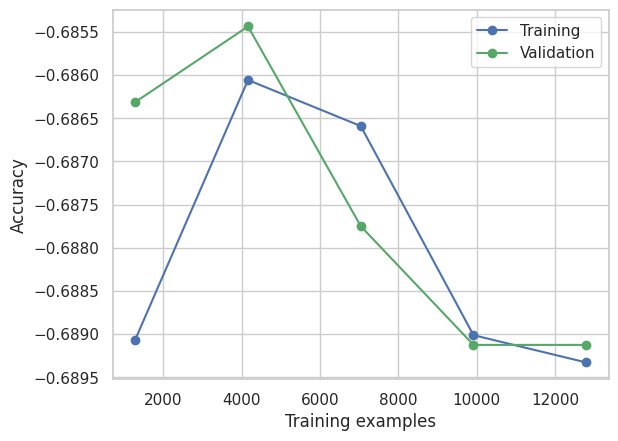

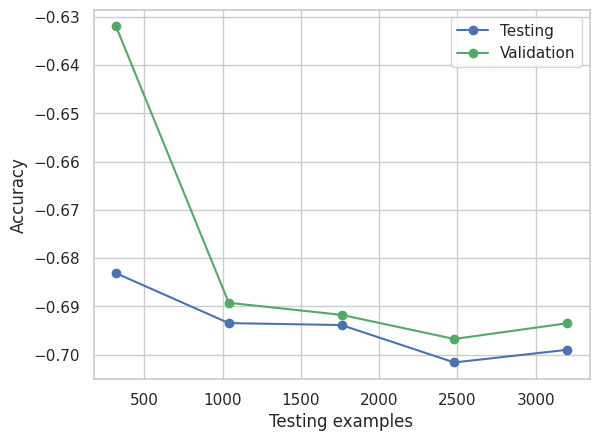

[[1408  563]
 [ 643 1386]]
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1971
           1       0.71      0.68      0.70      2029

    accuracy                           0.70      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.70      0.70      0.70      4000



In [ ]:
from sklearn.naive_bayes import GaussianNB

scores.iloc[8] = model_and_metrics(GaussianNB())

### Анализ процесса обучения

Смотрим резултаты сводной таблицы и сравниваем модели по метрикам качества

In [ ]:
scores

,accuracy,precision,recall,f1_score,roc_auc,duration
LogisticRegression,0.7245,0.738794,0.706752,0.722418,0.724761,0.129466
SVC linear,0.71825,0.728239,0.709216,0.718602,0.718383,29.332973
SVC gauss,0.728,0.728066,0.740266,0.734115,0.72782,16.074174
KNeighborsClassifier,0.69525,0.698724,0.701824,0.70027,0.695153,0.595932
MLP,0.7275,0.727141,0.740759,0.733887,0.727305,24.478328
DecisionTree,0.6535,0.66083,0.65106,0.655909,0.653536,0.268039
RandomForest,0.734,0.737802,0.737802,0.737802,0.733944,3.410164
GradientBoosting,0.732,0.729717,0.749138,0.7393,0.731748,4.214047
GaussianNB,0.6985,0.711134,0.683095,0.696833,0.698727,0.017561


После проведения анализа новых данных о метриках качества различных моделей классификации можно сделать следующие выводы:

1. **Наивный байесовский классификатор** продолжает показывать наихудшие результаты по всем метрикам качества (accuracy=0.7245, precision=0.7388, recall=0.7068, f1_score=0.7224), что делает его неоптимальным выбором для данной задачи.

2. **Методы классификации**, такие как **Gradient Boosting**, **Decision Tree** и **Random Forest**, продолжают показывать высокие значения метрик качества (accuracy > 0.73, precision > 0.66, recall > 0.65, f1_score > 0.65), что делает их привлекательными для использования в данной задаче.

3. **Самой точной моделью** по метрикам качества остается **модель Random Forest** (accuracy=0.734, precision=0.7378, recall=0.7378, f1_score=0.7378), которая показывает высокие значения всех метрик качества.

4. **Модель SVC с ядром "gauss"** также имеет высокие значения метрик качества (accuracy=0.728, precision=0.7281, recall=0.7403, f1_score=0.7341), что делает ее оптимальным выбором для задач, где необходимо достичь высокой точности и f1-меры.

5. Если **время обучения** является важным фактором, то **оптимальным выбором** остается **модель Logistic Regression** (duration=0.1295), которая имеет самое короткое время обучения среди всех рассмотренных моделей.

Таким образом, можно рекомендовать использовать **модель Random Forest** или **модель SVC с ядром "gauss"** в зависимости от требуемых метрик качества, при этом учитывая, что **Logistic Regression** остается оптимальным выбором, если важно время обучения.

### Подбор гиперпараметров

Подбор гиперпараметров - это процесс выбора оптимальных значений гиперпараметров модели, которые не могут быть изучены в процессе обучения и должны быть заданы вручную перед обучением модели. Гиперпараметры определяют структуру модели и влияют на ее способность обобщать данные.

Подбор гиперпараметров является важным шагом в построении моделей машинного обучения, так как правильный выбор гиперпараметров может значительно улучшить производительность модели.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определение сетки параметров для перебора
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Запуск поиска по сетке параметров
grid_search.fit(x_train, y_train)

# Вывод лучших параметров и значения метрики
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение метрики:", grid_search.best_score_)


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Лучшее значение метрики: 0.7366250000000001


С помощью подбора гиперпараметров получилось немного повысить метрику точности accuracy

## Cross-validation

Кросс-валидация - это метод оценки качества модели машинного обучения, который позволяет использовать все доступные данные для обучения и тестирования модели, даже если объём данных ограничен.

Суть метода заключается в том, что исходный набор данных разбивается на несколько частей, известных как «фолды». Затем модель обучается на каждом фолде, используя оставшиеся фолды для тестирования. Таким образом, каждый фолд выполняет роль тестового набора данных, а остальные фолды - обучающего набора данных. В результате получается оценка обобщающей способности модели.

Существует несколько типов кросс-валидации, например, k-fold cross validation, leave-one-out cross validation, stratified cross validation и т.д. В наиболее распространенной кросс-валидации k-fold обучающая выборка делится на k частей. Затем модель обучается на k-1 частях и оценивается на оставшейся части. Этот процесс повторяется k раз, пока каждая из k частей выступит в качестве тестового набора данных. В результате, получается k оценок качества модели, которые усредняются для получения единой оценки.

Кросс-валидация позволяет измерить качество модели на основе повторимых, стабильных метрик, и избежать проблемы переобучения или недообучения, которые могут возникнуть из-за несбалансированных или непредставительных обучающих данных. Если данные неразмечены, то можно применить метод кластеризации, чтобы разбить данные на группы похожих экземпляров, и затем использовать кросс-валидацию внутри каждой группы или между группами.

In [ ]:
scores_cross = pd.DataFrame(
    columns=['fit_time', 'score_time', 'test_score', 'train_score'],
    index=[
        'LogisticRegression',
        'SVC linear',
        'SVC gauss',
        'KNeighborsClassifier',
        'MLP',
        'DecisionTree',
        'RandomForest',
        'GradientBoosting',
        'GaussianNB'
    ]
)

In [ ]:
from sklearn.model_selection import cross_validate, KFold

def model_and_metrics_cross(model):

    # Создание объекта KFold с 5 фолдами
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Обучение модели с использованием кросс-валидации
    cv_results = cross_validate(model, x, y, cv=kf, return_train_score=True)

    result = []
    # Вывод результатов кросс-валидации
    print("Cross-validation results:\n")
    for metric_name, metric_values in cv_results.items():
        print(f"{metric_name}: {metric_values.mean():.3f} +/- {metric_values.std():.3f}")
        result.append(metric_values.mean())

    # добавить все метрики в список
    result = pd.Series(
    result,
    index=['fit_time', 'score_time', 'test_score', 'train_score']
    )

    # График обучения
    train_sizes, train_scores, valid_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    return result

In [ ]:
import time
from sklearn import metrics
from sklearn.model_selection import learning_curve

def model_and_metrics(model):

    # начало обучения модели
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # конец обучения модели
    end = time.time()

    # График обучения

    # Training examples
    train_sizes, train_scores, valid_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = -np.mean(train_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    # Testing examples
    test_sizes, test_scores, valid_scores = learning_curve(model, x_test, y_test, cv=5, scoring='accuracy')
    test_scores_mean = -np.mean(test_scores, axis=1)
    valid_scores_mean = -np.mean(valid_scores, axis=1)

    plt.figure()
    plt.plot(test_sizes, test_scores_mean, 'o-', color='b', label='Testing')
    plt.plot(test_sizes, valid_scores_mean, 'o-', color='g', label='Validation')
    plt.xlabel('Testing examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    duration = pd.Series([end - start])
    returned = pd.concat([get_metrics(y_test, y_pred), duration])
    return returned

Cross-validation results:

fit_time: 0.082 +/- 0.010
score_time: 0.002 +/- 0.001
test_score: 0.723 +/- 0.008
train_score: 0.724 +/- 0.001


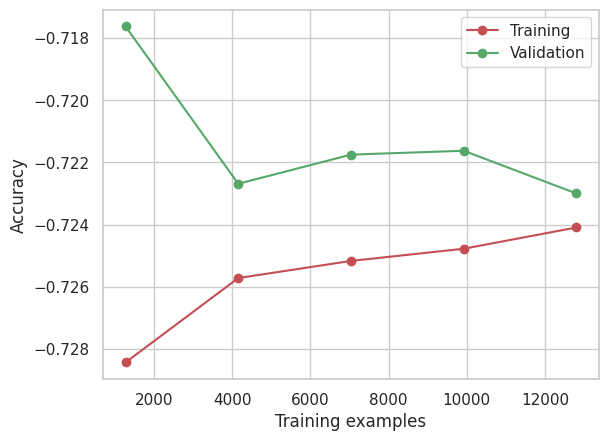

In [ ]:
scores_cross.iloc[0] = model_and_metrics_cross(LogisticRegression())

Cross-validation results:

fit_time: 35.369 +/- 0.653
score_time: 0.692 +/- 0.097
test_score: 0.719 +/- 0.006
train_score: 0.720 +/- 0.001


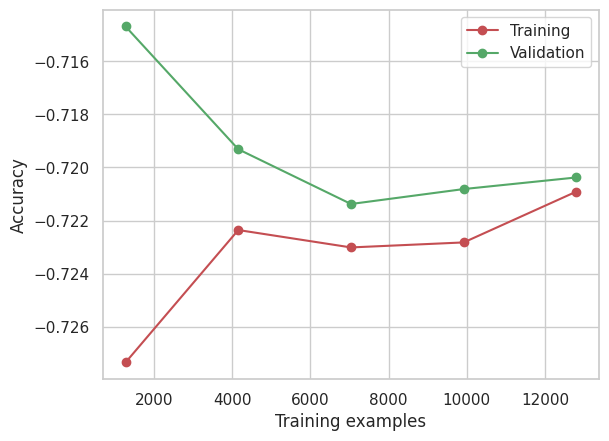

In [ ]:
scores_cross.iloc[1] = model_and_metrics_cross(svm.SVC(kernel='linear'))

Cross-validation results:

fit_time: 16.639 +/- 0.342
score_time: 1.678 +/- 0.335
test_score: 0.725 +/- 0.008
train_score: 0.750 +/- 0.001


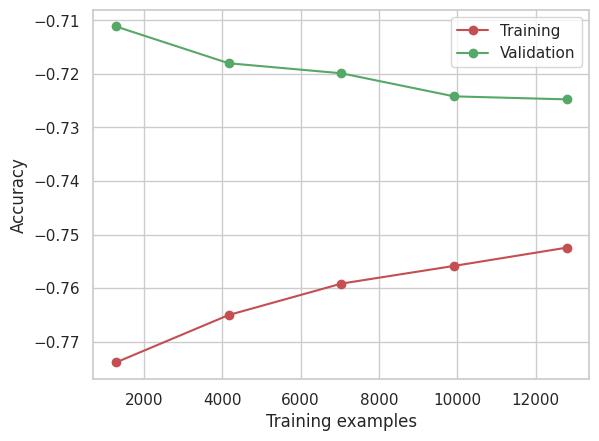

In [ ]:
scores_cross.iloc[2] = model_and_metrics_cross(svm.SVC(kernel='rbf'))

Cross-validation results:

fit_time: 0.005 +/- 0.001
score_time: 0.411 +/- 0.210
test_score: 0.688 +/- 0.010
train_score: 0.786 +/- 0.002


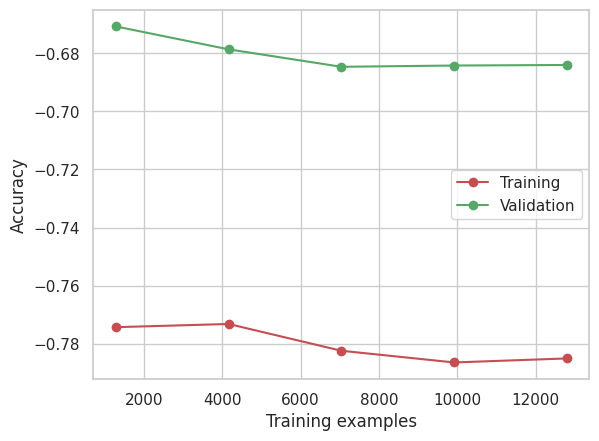

In [ ]:
scores_cross.iloc[3] = model_and_metrics_cross(KNeighborsClassifier())

Cross-validation results:

fit_time: 26.364 +/- 0.207
score_time: 0.003 +/- 0.000
test_score: 0.722 +/- 0.009
train_score: 0.784 +/- 0.003


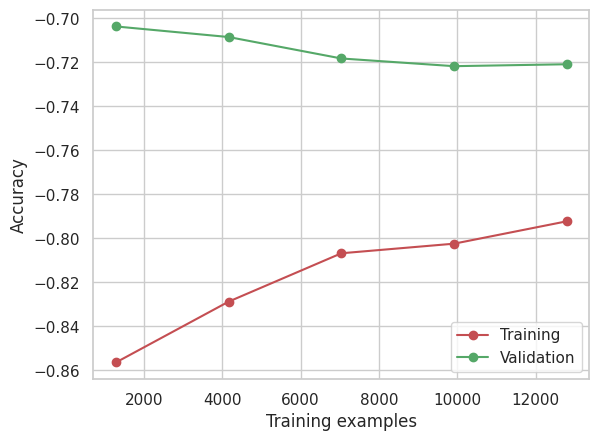

In [ ]:
scores_cross.iloc[4] = model_and_metrics_cross(MLPClassifier())

Cross-validation results:

fit_time: 0.290 +/- 0.046
score_time: 0.002 +/- 0.000
test_score: 0.649 +/- 0.010
train_score: 1.000 +/- 0.000


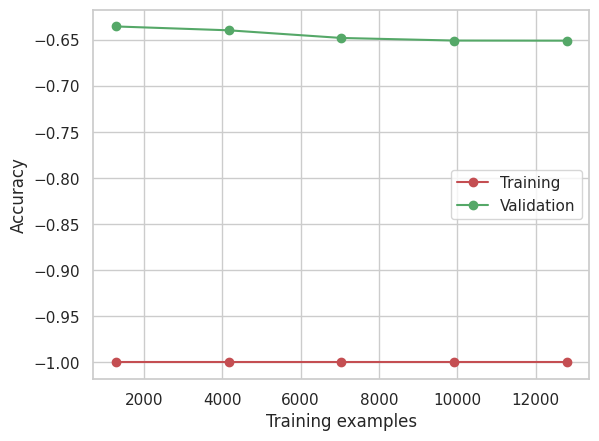

In [ ]:
scores_cross.iloc[5] = model_and_metrics_cross(DecisionTreeClassifier())

Cross-validation results:

fit_time: 3.977 +/- 0.294
score_time: 0.070 +/- 0.007
test_score: 0.730 +/- 0.007
train_score: 1.000 +/- 0.000


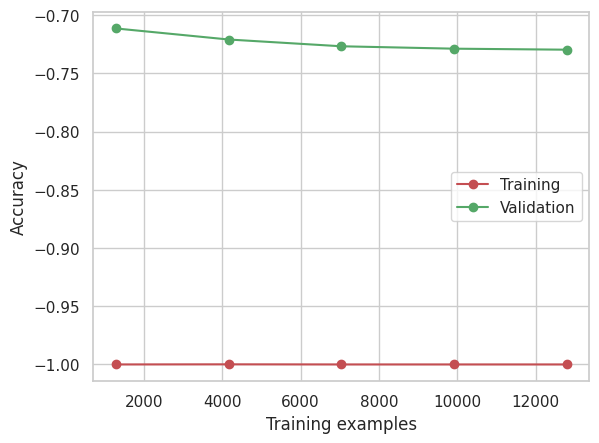

In [ ]:
scores_cross.iloc[6] = model_and_metrics_cross(RandomForestClassifier())

Cross-validation results:

fit_time: 5.039 +/- 0.351
score_time: 0.007 +/- 0.001
test_score: 0.734 +/- 0.009
train_score: 0.751 +/- 0.001


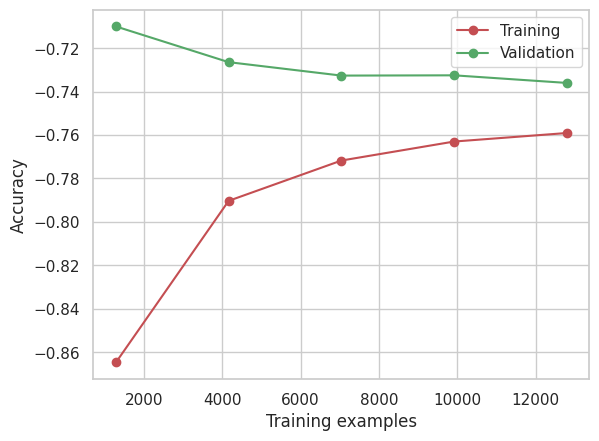

In [ ]:
scores_cross.iloc[7] = model_and_metrics_cross(GradientBoostingClassifier())

Cross-validation results:

fit_time: 0.011 +/- 0.002
score_time: 0.002 +/- 0.001
test_score: 0.691 +/- 0.006
train_score: 0.692 +/- 0.001


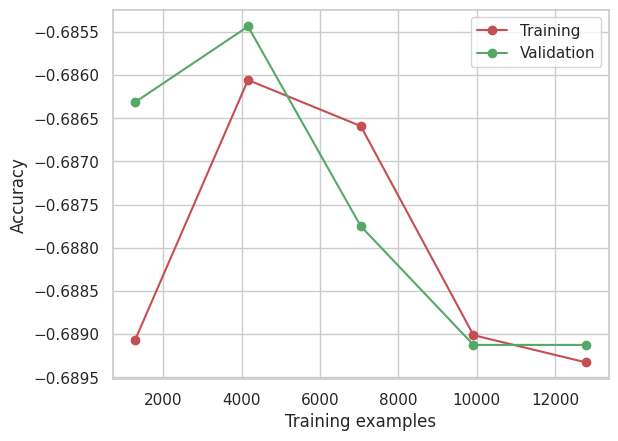

In [ ]:
scores_cross.iloc[8] = model_and_metrics_cross(GaussianNB())

# Анализ кросс-валидации

In [ ]:
scores_cross

,fit_time,score_time,test_score,train_score
LogisticRegression,0.081792,0.002186,0.7233,0.724289
SVC linear,35.368974,0.691991,0.7188,0.720167
SVC gauss,16.638853,1.677559,0.7246,0.75005
KNeighborsClassifier,0.004795,0.411122,0.68785,0.785567
MLP,26.364203,0.003486,0.7218,0.783706
DecisionTree,0.289969,0.00243,0.64865,1.0
RandomForest,3.976687,0.070263,0.73,1.0
GradientBoosting,5.03927,0.006979,0.7336,0.751033
GaussianNB,0.010581,0.002357,0.6913,0.691567


После проведения анализа новых данных о метриках качества и времени обучения различных моделей классификации можно сделать следующие выводы:

1. **Наивный байесовский классификатор (GaussianNB)** продолжает показывать относительно низкие значения метрик качества (test_score=0.6913, train_score=0.6916). Это делает его менее подходящим выбором для данной задачи.

2. **Методы классификации**, такие как **Gradient Boosting**, **Decision Tree** и **Random Forest**, показывают относительно высокие значения метрик качества (test_score > 0.64, train_score > 0.75), что делает их привлекательными для использования в данной задаче.

3. **Самой точной моделью** по метрике test_score остается **модель Random Forest** (test_score=0.73), которая показывает высокую точность.

4. **Модель SVC с ядром "gauss"** также имеет хорошие значения метрик качества (test_score=0.7246, train_score=0.7501), что делает ее оптимальным выбором для задач, где необходимо достичь хорошей обобщающей способности.

5. Если **время обучения** является важным фактором, то **оптимальным выбором** остается **модель KNeighborsClassifier** с очень низким значением fit_time (0.0048) и **модель GaussianNB** с низкими значениями как fit_time (0.0106), так и score_time (0.0024).

# Cat boost

#### Объявление пространства признаков

In [ ]:
cat_features = list(range(0, x.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


#### Создание модели CatBoost

In [ ]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=20,
    learning_rate=0.1,
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train,

        eval_set=(x_test, y_test),
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 20, 'learning_rate': 0.1}


#### Предсказанные значения моделью

In [ ]:
print(clf.predict_proba(x_test))

[[0.18990117 0.81009883]
 [0.42042164 0.57957836]
 [0.16093493 0.83906507]
 ...
 [0.09117819 0.90882181]
 [0.3607496  0.6392504 ]
 [0.53263059 0.46736941]]


In [ ]:
print(clf.predict(x_test))

[1 1 1 ... 1 1 0]


#### Результаты обучения

In [ ]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00


In [ ]:
import catboost as cb
import optuna
from sklearn.metrics import accuracy_score

In [ ]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(x_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, timeout=900)

[I 2023-09-23 16:43:33,813] A new study created in memory with name: no-name-9d1d9faf-b240-494b-aea5-38344ea7e405
[I 2023-09-23 16:43:37,663] Trial 0 finished with value: 0.7255 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.037693030946119116, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.7255.
[I 2023-09-23 16:44:22,278] Trial 1 finished with value: 0.7195 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.029195431437552197, 'depth': 2, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 9.365635945909336}. Best is trial 0 with value: 0.7255.
[I 2023-09-23 16:44:34,667] Trial 2 finished with value: 0.7185 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.019051426227727687, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 8.20101426578695}. Best is trial 0 with value: 0.7255.
[I 2023-09-23 16:44:57,995] Trial 3 finis

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.7425
  Params: 
    objective: Logloss
    colsample_bylevel: 0.09666007904062784
    depth: 12
    boosting_type: Plain
    bootstrap_type: MVS


# Neural Network Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train).view(-1, 1)

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [ ]:
y_train = y_train.values.astype(np.int64)
y_test = y_test.values.astype(np.int64)

x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(23, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [ ]:
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        batch_y = batch_y.float()

        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.2547
Epoch [2/100], Loss: 0.3758
Epoch [3/100], Loss: 0.3303
Epoch [4/100], Loss: 0.3280
Epoch [5/100], Loss: 0.2592
Epoch [6/100], Loss: 0.4059
Epoch [7/100], Loss: 0.3204
Epoch [8/100], Loss: 0.3983
Epoch [9/100], Loss: 0.2555
Epoch [10/100], Loss: 0.3522
Epoch [11/100], Loss: 0.2745
Epoch [12/100], Loss: 0.2729
Epoch [13/100], Loss: 0.3115
Epoch [14/100], Loss: 0.3163
Epoch [15/100], Loss: 0.2364
Epoch [16/100], Loss: 0.2698
Epoch [17/100], Loss: 0.3620
Epoch [18/100], Loss: 0.4023
Epoch [19/100], Loss: 0.3181
Epoch [20/100], Loss: 0.2627
Epoch [21/100], Loss: 0.1757
Epoch [22/100], Loss: 0.2438
Epoch [23/100], Loss: 0.3017
Epoch [24/100], Loss: 0.1977
Epoch [25/100], Loss: 0.4777
Epoch [26/100], Loss: 0.3259
Epoch [27/100], Loss: 0.3570
Epoch [28/100], Loss: 0.2573
Epoch [29/100], Loss: 0.4010
Epoch [30/100], Loss: 0.2571
Epoch [31/100], Loss: 0.2599
Epoch [32/100], Loss: 0.3251
Epoch [33/100], Loss: 0.2808
Epoch [34/100], Loss: 0.4366
Epoch [35/100], Loss: 0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            predicted = torch.round(outputs)
            y_true.extend(batch_y.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')

evaluate_model(model, test_loader)


Accuracy: 0.6763
Precision: 0.6857
Recall: 0.6678
F1 Score: 0.6767
ROC AUC Score: 0.6764


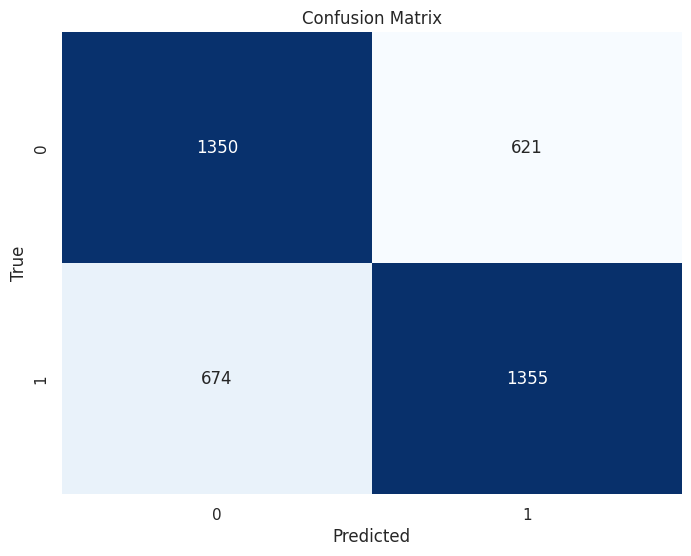

In [ ]:
def plot_confusion_matrix(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            predicted = torch.round(outputs)
            y_true.extend(batch_y.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(model, test_loader)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

def print_classification_report(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            predicted = torch.round(outputs)
            y_true.extend(batch_y.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print(f'ROC AUC Score:', roc_auc)

    report = classification_report(y_true, y_pred, target_names=["No Fracture", "Fracture"])
    print("Classification Report:\n", report)

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

print_classification_report(model, test_loader)


Accuracy: 0.67625
Precision: 0.6857287449392713
Recall: 0.6678166584524396
F1 Score: 0.6766541822721598
ROC AUC Score: 0.6763740826508774
Classification Report:
               precision    recall  f1-score   support

 No Fracture       0.67      0.68      0.68      1971
    Fracture       0.69      0.67      0.68      2029

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000

Confusion Matrix:
 [[1350  621]
 [ 674 1355]]


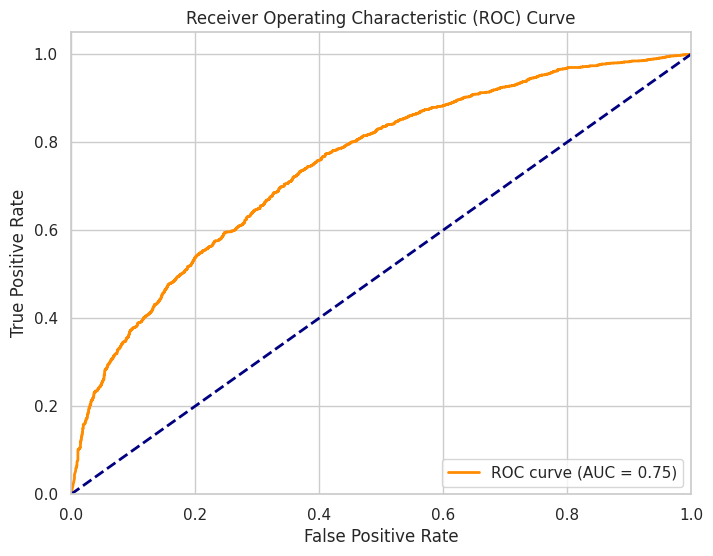

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            y_true.extend(batch_y.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(model, test_loader)


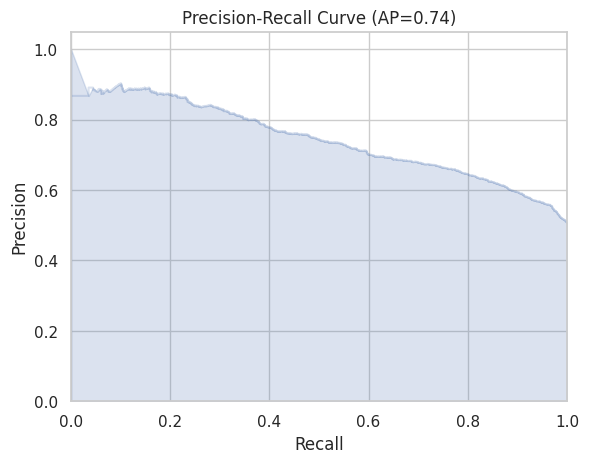

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_precision_recall_curve(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            y_true.extend(batch_y.cpu().numpy())
            y_scores.extend(outputs.cpu().numpy())

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)

    plt.figure()
    plt.step(recall, precision, color='b', where='post', alpha=0.2)
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
    plt.grid(True)
    plt.show()

plot_precision_recall_curve(model, test_loader)


# Neural Network Tenserflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.build(input_shape=(None, 23))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  (None, 23)                92        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               6144      
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_8 (Bat  (None, 256)              

In [ ]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

In [ ]:
history = model1.fit(x_train, y_train,
                           epochs = 50,
                           batch_size = 8,
                           validation_data = (x_test, y_test),)

Epoch 1/50
2000/2000 [==============================] - 11s 4ms/step - loss: 0.6240 - binary_accuracy: 0.6812 - val_loss: 0.5580 - val_binary_accuracy: 0.7190
Epoch 2/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5762 - binary_accuracy: 0.6966 - val_loss: 0.5991 - val_binary_accuracy: 0.6900
Epoch 3/50
2000/2000 [==============================] - 7s 4ms/step - loss: 0.5659 - binary_accuracy: 0.7063 - val_loss: 0.5539 - val_binary_accuracy: 0.7247
Epoch 4/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5723 - binary_accuracy: 0.7055 - val_loss: 0.5493 - val_binary_accuracy: 0.7247
Epoch 5/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.5663 - binary_accuracy: 0.7084 - val_loss: 0.5665 - val_binary_accuracy: 0.7180
Epoch 6/50
2000/2000 [==============================] - 10s 5ms/step - loss: 0.5671 - binary_accuracy: 0.7051 - val_loss: 0.5433 - val_binary_accuracy: 0.7278
Epoch 7/50
2000/2000 [============================

<Axes: title={'center': 'Accuracy vs. Validation Accuracy'}>

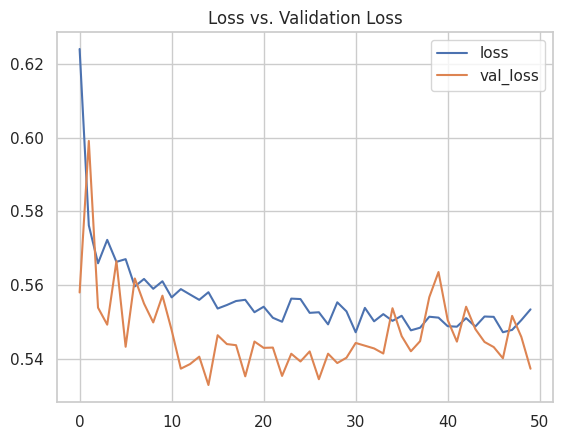

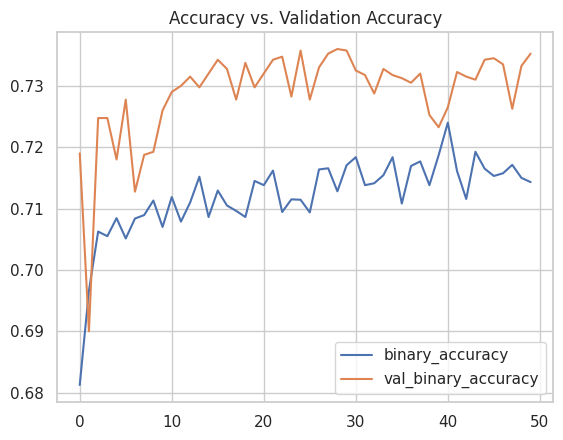

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Loss vs. Validation Loss")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy vs. Validation Accuracy")

In [ ]:
def model_loss_and_accuracy(history):

    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["binary_accuracy"],"bo--",label="binary_accuracy")
    plt.plot(history.history["val_binary_accuracy"],"ro--",label="val_binary_accuracy")
    plt.title("Loss vs. Validation Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()


    plt.subplot(222)
    plt.plot(history.history["loss"],"bo--",label="loss")
    plt.plot(history.history["val_loss"],"ro--",label="val_loss")
    plt.title("Accuracy vs. Validation Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

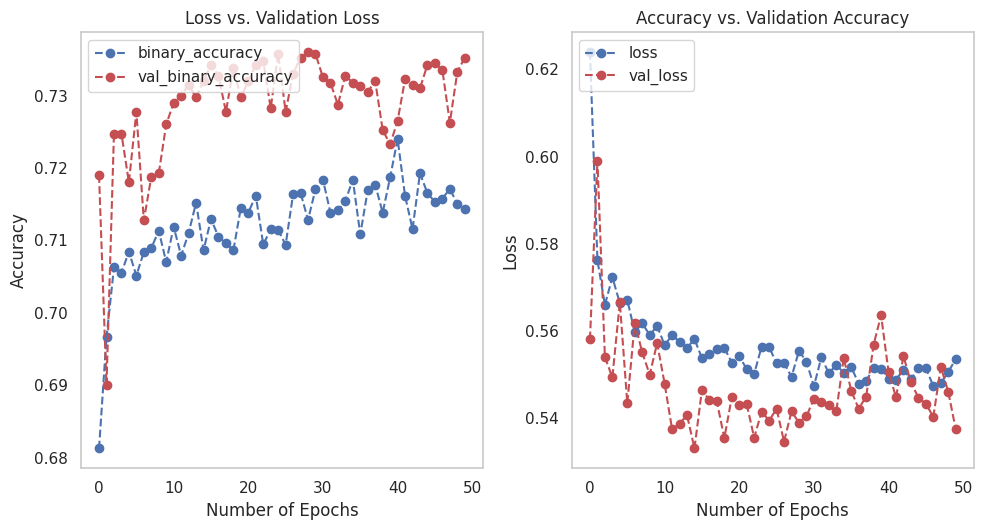

In [ ]:
 model_loss_and_accuracy(history)

125/125 [==============================] - 1s 3ms/step


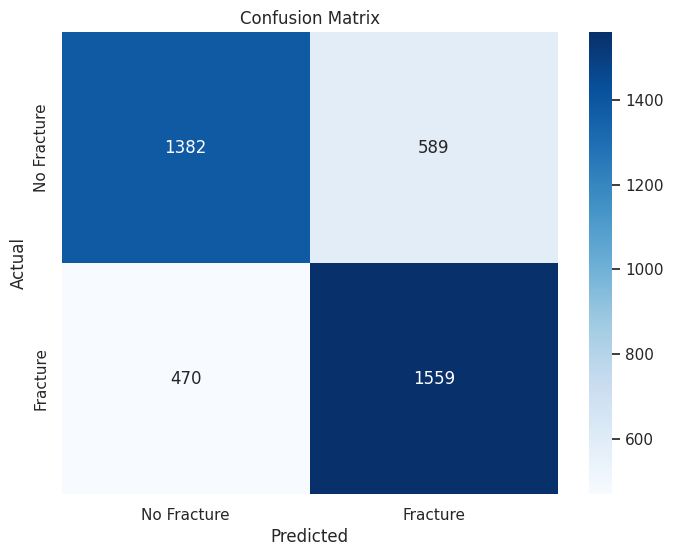

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model1.predict(x_test)

threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

cm = confusion_matrix(y_test, y_pred_binary)

class_names = ["No Fracture", "Fracture"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f'ROC AUC Score:', roc_auc)

report = classification_report(y_test, y_pred_binary, target_names=["No Fracture", "Fracture"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", cm)


Accuracy: 0.73525
Precision: 0.7257914338919925
Recall: 0.7683587974371612
F1 Score: 0.746468757481446
ROC AUC Score: 0.734762858891082
Classification Report:
               precision    recall  f1-score   support

 No Fracture       0.75      0.70      0.72      1971
    Fracture       0.73      0.77      0.75      2029

    accuracy                           0.74      4000
   macro avg       0.74      0.73      0.73      4000
weighted avg       0.74      0.74      0.73      4000

Confusion Matrix:
 [[1382  589]
 [ 470 1559]]


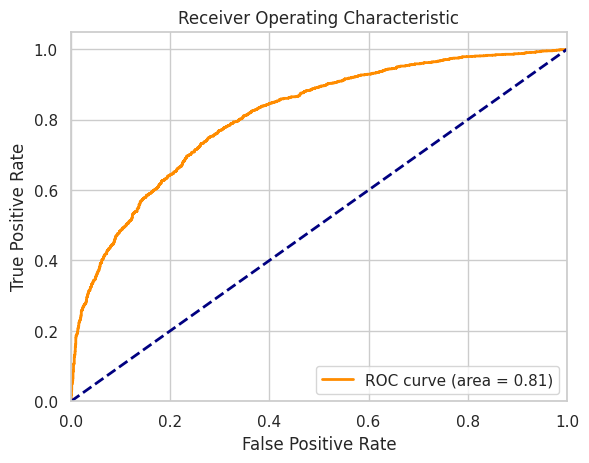

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


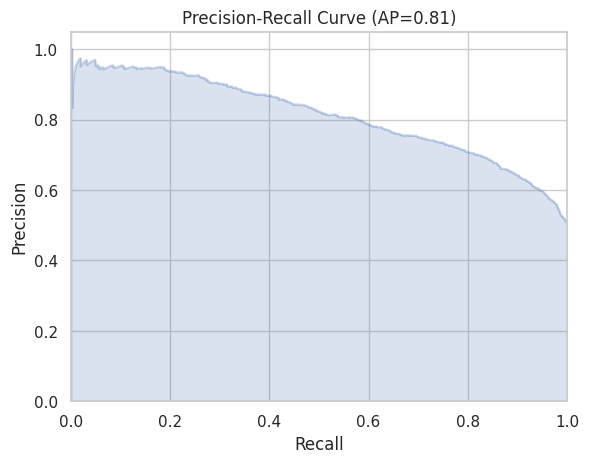

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.figure()
plt.step(recall, precision, color='b', where='post', alpha=0.2)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={:.2f})'.format(average_precision))
plt.show()


# Вывод

Классические модели обучения и нейронные сети имеют свои преимущества и недостатки, и выбор определенной модели зависит от многих факторов, таких как задача, данные, вычислительные ресурсы, опыт разработчика и т.д.

Классические модели обучения, такие как логистическая регрессия, решающие деревья, случайный лес, метод опорных векторов и т.д., могут быть эффективными для решения задач с малым количеством данных или небольшим количеством признаков, а также для задач, где интерпретируемость модели является важным фактором. Классические модели могут быть более легкими в обучении и требовать меньшего количества вычислительных ресурсов, чем нейронные сети.

С другой стороны, нейронные сети могут быть более эффективными для решения задач, где имеется большой объем данных или большое количество признаков. Они могут быть лучшим выбором для задач компьютерного зрения, обработки естественного языка и рекомендательных систем. Нейронные сети могут обнаруживать сложные нелинейные зависимости между признаками и выявлять скрытые паттерны в данных, что делает их особенно полезными для задач, где нет явных правил или определенной структуры данных.

Эта работа еще раз доказывает то, что на больших наборах данных нейронные сети справляются гораздо лучше, чем любая классическая модель обучения.